In [1]:
%matplotlib inline
# ---- settings ----
import json
Settings = json.load(open('../settings.txt'))
print('\n')
# ------------------
import matplotlib.pyplot as plt
import sys
from time import time
import cv2
import numpy as np
from os.path import join, isdir
sys.path.append('./../../easy_multi_person_pose_estimation')
sys.path.insert(0,'../')
import mvpose.data.transform as tfm

root = join(Settings['data_root'], 'pak')

from poseestimation import model
pe = model.PoseEstimator()

Using TensorFlow backend.


## UMPM

In [2]:
from pak.datasets.UMPM import UMPM
user = Settings['UMPM']['username']
pwd = Settings['UMPM']['password']

X, Y, Calib = tfm.get_from_umpm(root, 'p2_free_1', user, pwd)

UMPM



cam 1	elapsed: 2.082944631576538

cam 2	elapsed: 2.0446462631225586

cam 3	elapsed: 2.020414113998413

cam 4	elapsed: 2.0297603607177734


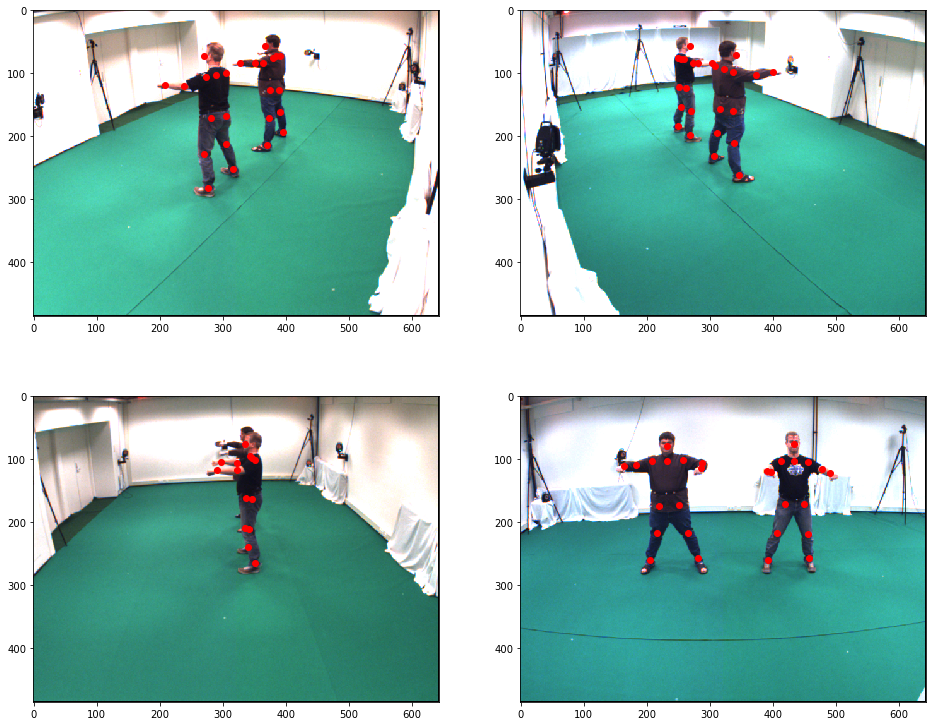

In [4]:
fig = plt.figure(figsize=(16,13))

def handle_img(ax, cam, frame):
    x = X[cam][frame]
    _start = time()
    positions = pe.predict(x)
    _end = time()
    print()
    print('cam ' + str(cam+1) + '\telapsed:', _end - _start)

    positions = tfm.transform_from_openpose(positions)
    positions_frame0 = positions[0]
    for k in positions_frame0:
        for x,y in k:
            if x > 0 and y > 0:
                ax.scatter(y,x, color='red')
    ax.imshow(X[cam][frame])
    return positions[0]
    
frame = 0
fig = plt.figure(figsize=(16,13))
pos_cam1 = handle_img(fig.add_subplot(221), 0, frame=frame)
pos_cam2 = handle_img(fig.add_subplot(222), 1, frame=frame)
pos_cam3 = handle_img(fig.add_subplot(223), 2, frame=frame)
pos_cam4 = handle_img(fig.add_subplot(224), 3, frame=frame)
plt.show()